Matlab package in Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install octave

In [ ]:
!octave -W /content/drive/MyDrive/Summer_Internship/realtime_fire/theramalplot.m

Importing the necessary packages for the code

In [ ]:
from numpy import expand_dims, zeros, ones, asarray
from numpy.random import randn, randint
#import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Model, Sequential

from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from keras.layers import LeakyReLU, Dropout, Lambda, Activation

from PIL import Image , ImageOps
import os
import numpy as np

from matplotlib import pyplot as plt
from keras import backend as K

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate

Creating the dataset for training 



---
Vectorized images in an .npz format with labels


---
200 images. 100 fire + 100 non fire

In [ ]:
def load_custom():
  label_1 = []
  vectorized_images_x = []
  count_1 = 0
  count=0
  path_to_files_train = "/content/drive/MyDrive/Summer_Internship/realtime_fire/matlab/"
  for img in os.listdir(path_to_files_train):
    if 'nonfire_' in img:            #if your image name contain 'contrast'
      label_1.append((0))
      image_1 = Image.open(path_to_files_train + img).convert('L')
      image_1 = image_1.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_1)
      vectorized_images_x.append(image_array)
      count=count+1
    elif 'fire_' in img:
      label_1.append((1))
      image_1 = Image.open(path_to_files_train + img).convert('L')
      image_1 = image_1.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_1)
      vectorized_images_x.append(image_array)
      count_1= count_1+1
    elif 'img_' in img:            #if your image name contain 'contrast'
      label_1.append((0))
      image_1 = Image.open(path_to_files_train + img).convert('L')
      image_1 = image_1.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_1)
      vectorized_images_x.append(image_array)
      count=count+1
  print(count_1+count)
  np.savez("/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_train_final28.npz",DataX=vectorized_images_x,trainy=label_1)

load_dadaset=load_custom()

200


In [ ]:
def load_custom():
  label_1 = []
  vectorized_images_x = []
  count_1 = 0
  count=0
  path_to_files_train = "/content/drive/MyDrive/Summer_Internship/realtime_fire/matlab/"
  for img in os.listdir(path_to_files_train):
    if 'nonfire_' in img:            #if your image name contain 'contrast'
      label_1.append((0))
      image_1 = Image.open(path_to_files_train + img).convert('L')
      image_1 = image_1.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_1)
      vectorized_images_x.append(image_array)
      count=count+1
    elif 'img_' in img:            #if your image name contain 'contrast'
      label_1.append((0))
      image_1 = Image.open(path_to_files_train + img).convert('L')
      image_1 = image_1.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_1)
      vectorized_images_x.append(image_array)
      count=count+1
    elif 'fire_' in img:
      label_1.append((1))
      image_1 = Image.open(path_to_files_train + img).convert('L')
      image_1 = image_1.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_1)
      vectorized_images_x.append(image_array)
      count_1= count_1+1

  print(count_1+count)
  print(label_1)
  np.savez("/content/drive/MyDrive/Summer_Internship/mlx_fire_train_final28.npz",DataX=vectorized_images_x,trainy=label_1)

load_dadaset=load_custom()

200
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [ ]:
def load_custom():
  label_1 = []
  vectorized_images_x = []
  count_1 = 0
  count=0
  path_to_files_train = "/content/drive/MyDrive/Summer_Internship/realtime_fire/12img/mlx/"
  for img in os.listdir(path_to_files_train):
    if 'nonfire_' in img:            #if your image name contain 'contrast'
      label_1.append((0))
      image_1 = Image.open(path_to_files_train + img).convert('L')
      image_1 = image_1.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_1)
      vectorized_images_x.append(image_array)
      count=count+1
    elif 'fire_' in img:
      label_1.append((1))
      image_1 = Image.open(path_to_files_train + img).convert('L')
      image_1 = image_1.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_1)
      vectorized_images_x.append(image_array)
      count_1= count_1+1
    elif 'img_' in img:            #if your image name contain 'contrast'
      label_1.append((0))
      image_1 = Image.open(path_to_files_train + img).convert('L')
      image_1 = image_1.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_1)
      vectorized_images_x.append(image_array)
      count=count+1
  print(count_1+count)
  np.savez("/content/drive/MyDrive/Summer_Internship/12img_fire_train_final28.npz",DataX=vectorized_images_x,trainy=label_1)

load_dadaset=load_custom()

12


Creating the dataset for testing 



---
Vectorized images in an .npz format with labels


---
200 images. 100 fire + 100 non fire

In [ ]:
def test_custom():
  label_2 = []
  vectorized_images_y = []
  count_1 = 0
  count=0
  path_to_files_train = "/content/drive/MyDrive/Summer_Internship/realtime_fire/test/"
  for img in os.listdir(path_to_files_train):
    if 'nonfire_' in img:            #if your image name contain 'contrast'
      label_2.append((0))
      image_2 = Image.open(path_to_files_train + img).convert('L')
      image_2 = image_2.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_2)
      vectorized_images_y.append(image_array)
      count= count+1
    elif 'fire_' in img:
      label_2.append((1))
      image_2 = Image.open(path_to_files_train + img).convert('L')
      image_2 = image_2.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_2)
      vectorized_images_y.append(image_array)
      count_1= count_1+1
  print(count_1+count)
  np.savez("/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_final28.npz",Datay=vectorized_images_y,testy=label_2)

test_custom()

200


In [ ]:
def test_custom():
  label_2 = []
  vectorized_images_y = []
  count_1 = 0
  count=0
  path_to_files_train = "/content/drive/MyDrive/Summer_Internship/realtime_fire/mlx/test/nonfire/"
  path_to_files_train_1 = "/content/drive/MyDrive/Summer_Internship/realtime_fire/mlx/test/fire/"
  for img in os.listdir(path_to_files_train):
           #if your image name contain 'contrast'
    label_2.append((0))
    image_2 = Image.open(path_to_files_train + img).convert('L')
    image_2 = image_2.resize((28,28), Image.ANTIALIAS)
    image_array = np.array(image_2)
    vectorized_images_y.append(image_array)
    count= count+1
  for img1 in os.listdir(path_to_files_train_1):
    label_2.append((1))
    image_2 = Image.open(path_to_files_train_1 + img1).convert('L')
    image_2 = image_2.resize((28,28), Image.ANTIALIAS)
    image_array = np.array(image_2)
    vectorized_images_y.append(image_array)
    count_1= count_1+1
  print(count_1+count)
  #print(label_2)
  np.savez("/content/drive/MyDrive/Summer_Internship/mlx_fire_test_final28.npz",Datay=vectorized_images_y,ty=label_2)

test_custom()

200


In [ ]:
def test_custom():
  label_2 = []
  vectorized_images_y = []
  count_1 = 0
  count=0
  path_to_files_train = "/content/drive/MyDrive/Summer_Internship/realtime_fire/misclassified/"
  for img in os.listdir(path_to_files_train):
    if 'nonfire_' in img:            #if your image name contain 'contrast'
      label_2.append((0))
      image_2 = Image.open(path_to_files_train + img).convert('L')
      image_2 = image_2.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_2)
      vectorized_images_y.append(image_array)
      count= count+1
    elif 'fire_' in img:
      label_2.append((1))
      image_2 = Image.open(path_to_files_train + img).convert('L')
      image_2 = image_2.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_2)
      vectorized_images_y.append(image_array)
      count_1= count_1+1
  print(count_1+count)
  np.savez("/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_mfinal28.npz",Datay=vectorized_images_y,testy=label_2)

test_custom()

14


In [ ]:
def test_custom():

  vectorized_images_y = []
  count_1 = 0
  count=0
  path_to_files_train = "/content/drive/MyDrive/Summer_Internship/realtime_fire/realt/"
  for img in os.listdir(path_to_files_train):
    if 'img_' in img:            #if your image name contain 'contrast'
      
      image_2 = Image.open(path_to_files_train + img).convert('L')
      image_2 = image_2.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_2)
      vectorized_images_y.append(image_array)
      count= count+1
  print(count_1+count)
  np.savez("/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_finaltest28.npz",Datay=vectorized_images_y)

test_custom()

53


Display of how the image will look after cropping, resizing and converting it to 1 channel image

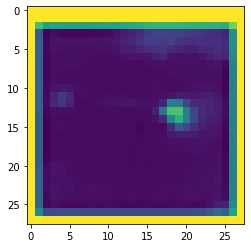

In [ ]:
import cv2 
vectorized_images_y=[]
image_1 = Image.open('/content/drive/MyDrive/Summer_Internship/realtime_fire/mlx/test/fire/fire_1.jpg')
    #image_1.thumbnail((28,28))
image_1 = image_1.resize((28,28)).convert('L')


#image_2 = im2gray(image_2);
image_array = np.array(image_1)
    #image_array = np.array(image_2)
vectorized_images_y.append(image_array)
#image_2 = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
plt.imshow(image_1)
#vectorized_images_y.append(image_array)
#plt.imshow(image_2)
#print(vectorized_images_y)

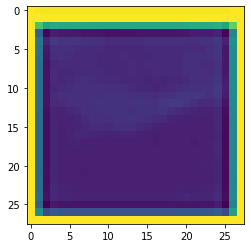

In [ ]:
vectorized_images_y=[]
image_2 = Image.open('/content/drive/MyDrive/Summer_Internship/realtime_fire/matlab/nonfire_29.png')
    #image_1.thumbnail((28,28))
image_2 = image_2.resize((28,28), Image.ANTIALIAS).convert('L')
    #image_2 = im2gray(image_2);
image_array = np.array(image_2)
    #image_array = np.array(image_2)
vectorized_images_y.append(image_array)
#vectorized_images_y.append(image_array)
plt.imshow(image_2)
#print(vectorized_images_y)

Cell for training and testing.

---
Running this cell will train the model, test it every epochs/10 times and saves the models

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 32), dtype=tf.float32, name=None), name='leaky_re_lu_9/LeakyRelu:0', description="created by layer 'leaky_re_lu_9'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 64), dtype=tf.float32, name=None), name='leaky_re_lu_10/LeakyRelu:0', description="created by layer 'leaky_re_lu_10'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 128), dtype=tf.float32, name=None), name='leaky_re_lu_11/LeakyRelu:0', description="created by layer 'leaky_re_lu_11'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_3/BiasAdd:0', description="created by layer 'dense_3'")
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        32

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(200, 28, 28, 1) (200,)
n_epochs=200, n_batch=200, b/e=1, steps=200
>1, c[0.693,52], d[0.409,1.099], g[0.406]
>2, c[0.691,60], d[0.397,1.101], g[0.405]
>3, c[0.690,55], d[0.386,1.104], g[0.404]
>4, c[0.689,56], d[0.376,1.107], g[0.402]
>5, c[0.690,52], d[0.365,1.111], g[0.401]
>6, c[0.688,61], d[0.354,1.118], g[0.398]
>7, c[0.683,70], d[0.342,1.125], g[0.395]
>8, c[0.683,70], d[0.330,1.135], g[0.393]
>9, c[0.683,57], d[0.317,1.144], g[0.389]
>10, c[0.687,50], d[0.305,1.154], g[0.387]
>11, c[0.679,54], d[0.292,1.164], g[0.384]
>12, c[0.682,55], d[0.280,1.173], g[0.381]
>13, c[0.674,68], d[0.266,1.183], g[0.378]
>14, c[0.674,69], d[0.253,1.193], g[0.376]
>15, c[0.667,82], d[0.240,1.204], g[0.373]
>16, c[0.668,73], d[0.229,1.217], g[0.371]
>17, c[0.662,70], d[0.216,1.224], g[0.371]
>18, c[0.675,56], d[0.205,1.222], g[0.373]
>19, c[0.653,80], d[0.193,1.219], g[0.373]
>20, c[0.654,77], d[0.180,1.215], g[0.376]
>21, c[0.648,76], d[0.166,1.218], g[0.377]
>22, c[0.646,80], d[0.156,1.215], g[0.

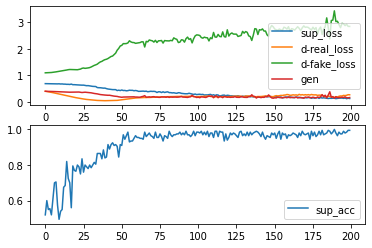

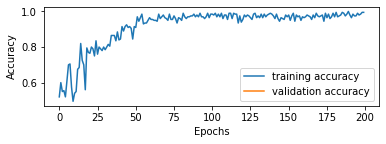

In [ ]:
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
z=[]
ganop=[]
testacc=[]
#GLOBAL VARIABLE FOR NUMBER OF CLASSES , BATCHES , EPOCHS
n_epochs = 200
n_classes = 2
n_batch = 200
latent_dim = 100
n_samples = 200

def define_generator(latent_dim):
	
  in_lat = Input(shape=(latent_dim,))
	#Start with enough dense nodes to be reshaped and ConvTransposed to 28x28x1
  n_nodes = 256 * 7 * 7
  X = Dense(n_nodes)(in_lat)
  X = LeakyReLU(alpha=0.2)(X)
  X = Reshape((7,7, 256))(X)
	
  X = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(X) #14x14x128
  X = LeakyReLU(alpha=0.2)(X)
	
  X = Conv2DTranspose(64, (3,3), strides=(1,1), padding='same')(X) #14x14x64
  X = LeakyReLU(alpha=0.2)(X)
	# output
  out_layer = Conv2DTranspose(1, (3,3), strides=(2,2), activation='tanh', 
                             padding='same')(X) #28x28x1
	# define model
  model = Model(in_lat, out_layer)
  model.summary()
  return model

  
def define_discriminator(in_shape=(28,28,1), n_classes=n_classes):
    in_image = Input(shape=in_shape)
    X = Conv2D(32, (3,3), strides=(2,2), padding='same')(in_image)
    X = LeakyReLU(alpha=0.2)(X)
    print(X)
    X = Conv2D(64, (3,3), strides=(2,2), padding='same')(X)
    X = LeakyReLU(alpha=0.2)(X)
    print(X)
    X = Conv2D(128, (3,3), strides=(2,2), padding='same')(X)
    X = LeakyReLU(alpha=0.2)(X)
    print(X)
    X = Flatten()(X)
    X = Dropout(0.4)(X) #Consider adding more dropout layers to minimize overfitting - remember we work with limited labeled data. 
    X = Dense(n_classes)(X)
    print(X)
    model = Model(inputs=in_image, outputs=X)
    model.summary()
    return model
define_discriminator()

def define_sup_discriminator(disc):
    model=Sequential()
    model.add(disc)
    model.add(Activation('softmax'))
    #Let us use sparse categorical loss so we dont have to convert our Y to categorical
    model.compile(optimizer=Adam(lr=0.0002, beta_1=0.5, epsilon=1e-07), 
                  loss="sparse_categorical_crossentropy",metrics=['accuracy'])
    return model

#Define the unsupervised discriminator
#Takes the output of the supervised, just before the softmax activation. 
#Then, adds a layer with calculation of sum of exponential outputs. (defined below as custom_activation)


#This custom activation layer gives a value close to 0 for smaller activations
#in the prior discriminator layer. It gives values close to 1 for large activations.
#This way it gives low activation for fake images. No need for sigmoid anymore.  

# custom activation function for the unsupervised discriminator
#D(x) = Z(x) / (Z(x) + 1) where Z(x) = sum(exp(l(x))). l(x) is the output from sup discr. prior to softmax
def custom_activation(x):
    Z_x = K.sum(K.exp(x), axis=-1, keepdims=True)
    D_x = Z_x /(Z_x+1)
    
    return D_x

def define_unsup_discriminator(disc):
    model=Sequential()
    model.add(disc)
    #model.add(Activation('softmax'))
    model.add(Lambda(custom_activation))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=2e-04, beta_1=0.5, epsilon = 1e-07))
    return model
# define the combined generator and discriminator model, for updating the generator
def define_gan(gen_model, disc_unsup):
	
  disc_unsup.trainable = True # make unsup. discriminator not trainable
  gan_output = disc_unsup(gen_model.output) #Gen. output is the input to disc. 
  model = Model(gen_model.input, gan_output)
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=2e-04, beta_1=0.5, epsilon=1e-07))
  ganop.append(gan_output)
  return model

#gan_model = define_gan(gen_model, disc_unsup)
#print("GAN MODEL SUMMARY::")
#print(gan_model.summary())

# load the images
def load_real_samples(n_classes=n_classes):
  path = "/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_train_final28.npz"
  with np.load(path , allow_pickle=True) as data:
    #load DataX as train_data
    trainX = data['DataX']
    trainy = data['trainy'] 
    (trainX, trainy) = (trainX, trainy)
    X = expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = (X - 127.5) / 127.5  # scale from [0,255] to [-1,1] as we will be using tanh activation. 
    print(X.shape, trainy.shape)
    return [X, trainy]


#USED TO SELECT IMAGES. BUT IN OUR CASE ITS CHOOSING ALL THE 4 IMAGES
def select_supervised_samples(dataset, n_samples=n_samples, n_classes=n_classes):
  X, y = dataset
  X_list, y_list = list(), list()
  X_list = X
  y_list = y
  #print(X_list)
  #print(y_list)
  return asarray(X_list), asarray(y_list)    


# Pick real samples from the dataset.
#Return both images and corresponding labels in addition to y=1 indicating that the images are real. 
#Remember that we will not use the labels for unsupervised, only used for supervised. 
def generate_real_samples(dataset, n_samples=n_samples):
    
	images, labels = dataset
	ix = randint(0, images.shape[0], n_samples)
	X, labels = images[ix], labels[ix] #Select random images and corresponding labels
	y = ones((n_samples, 1)) #Label all images as 1 as these are real images. (for the discriminator training) 
	return [X, labels], y

# generate latent points, to be used as inputs to the generator. 
def generate_latent_points(latent_dim, n_samples=n_samples):
  z_input = randn(latent_dim * n_samples)
  z_input = z_input.reshape(n_samples, latent_dim) # reshape for input to the network
  #print(z_input)
  #z.append(z_input)
  return z_input

# Generate fake images using the generator and above latent points as input to it. 
#We do not care about labeles so the generator will not know anything about the labels. 
def generate_fake_samples(generator, latent_dim, n_samples=n_samples):
	
  z_input = generate_latent_points(latent_dim, n_samples)
  fake_images = generator.predict(z_input)
	# create class labels
  y = zeros((n_samples, 1)) #Label all images as 0 as these are fake images. (for the discriminator training) 
  #print(fake_images)

  return fake_images, y

# report accuracy and save plots & the model periodically. 
def summarize_performance(step, gen_model, disc_sup, latent_dim, dataset, n_samples=n_samples):
	# Generate fake images
  B, _ = generate_fake_samples(gen_model, latent_dim, n_samples)
  B = (B + 1) / 2.0 # scale to [0,1] for plotting
  A, _ = select_supervised_samples(dataset, n_samples=n_samples, n_classes=n_classes)
  A, _ = load_real_samples(n_classes)
  A = (A+1)/2.0
	# plot images
	# plot images
  
  #for i in range(n_steps):
  #if (i+1) % ((n_epochs/50) * 1) == 0:
  #for i in range(5):
    #plt.subplot(10, 10, 1 + i)
    #plt.axis('off')
    #plt.imshow(B[i, :, :, 0], cmap='gray_r')
    #plt.show()
      #filename1 = 'generated_img_%04d.png' % (n_epochs)
      #plt.savefig(filename1)
  #for i in range(5):
    #plt.subplot(10, 10, 1 + i)
    #plt.axis('off')
    #plt.imshow(A[i, :, :, 0], cmap='gray_r')
    #plt.show()

	# #save plot to drive

  #plt.close()  
	# evaluate the discriminator
 
  X, y = dataset
  X_fake, y_fake = generate_fake_samples(gen_model, latent_dim, n_batch)
  _, acc = disc_sup.evaluate(X, y, verbose=0)
  a1.append(acc)
  print('Discriminator Accuracy: %.3f%%' % (acc * 100))
  #print('Unsup Disc Output')
  #print(ganop)
  #ac = disc_unsup.evaluate(X_fake , y_fake, verbose=0)
  #print('Unsup Discriminator Accuracy: %.3f%%' % (ac * 100))



# train the generator and discriminator
def train(gen_model, disc_unsup, disc_sup, gan_model, dataset, latent_dim, n_epochs=n_epochs, n_batch=n_batch):
	
    # select supervised dataset for training.
   
  X_sup, y_sup = select_supervised_samples(dataset)
	#print(X_sup.shape, y_sup.shape)
	
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
	# iterations
  n_steps = bat_per_epo * n_epochs
	
  #half_batch = int(n_batch / 2)
  print('n_epochs=%d, n_batch=%d, b/e=%d, steps=%d' % (n_epochs, 
                                                              n_batch, 
                                                              bat_per_epo, n_steps))
	
    #  enumerate epochs
  for j in range(n_epochs):
    for i in range(bat_per_epo):
		# update supervised discriminator (disc_sup) on real samples.
        #Remember that we use real labels to train as this is supervised. 
        #This is the discriminator we really care about at the end.
        #Also, this is a multiclass classifier, not binary. Therefore, our y values 
        #will be the real class labels for MNIST. (NOT 1 or 0 indicating real or fake.)
      [Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], n_batch)
      sup_loss, sup_acc = disc_sup.train_on_batch(Xsup_real, ysup_real)

          
		# update unsupervised discriminator (disc_unsup) - just like in our regular GAN.
        #Remember that we will not train on labels as this is unsupervised, just binary as in our regular GAN.
        #The y_real below indicates 1s telling the discriminator that these images are real. 
        #do not confuse this with class labels. 
        #We will discard this discriminator at the end. 
      [X_real, _], y_real = generate_real_samples(dataset, n_batch) 
      d_loss_real  = disc_unsup.train_on_batch(X_real, y_real)
        #Now train on fake. 
      X_fake, y_fake = generate_fake_samples(gen_model, latent_dim, n_batch)
      d_loss_fake  = disc_unsup.train_on_batch(X_fake, y_fake)
        
		# update generator (gen) - like we do in regular GAN.
        #We can discard this model at the end as our primary goal is to train a multiclass classifier (sup. disc.)
      X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
      gan_loss = gan_model.train_on_batch(X_gan, y_gan)
      a2.append(sup_acc)
      a3.append(gan_loss)
      a4.append(sup_loss)
      a5.append(d_loss_real)
      a6.append(d_loss_fake)

		# evaluate the model performance every 'epoch'
    #plot_history(a4, a5, a3, a2) 
    # record history
   
		# summarize loss on this batch
    print('>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]' % (j+1, sup_loss, sup_acc*100, d_loss_real, d_loss_fake, gan_loss))
		# evaluate the model performance periodically

'''
    #if (j+1) % ((n_epochs/10) * 1) == 0:
    summarize_performance(i, gen_model, disc_sup, latent_dim, dataset)

    filename2 = 'gen_model_%04d.h5' % (j+1)
    gen_model.save(filename2)
	# save the Discriminator (classifier) model
    filename3 = 'disc_sup_%04d.h5' % (j+1)
    disc_sup.save(filename3)

    filename4 = 'disc_unsup_%04d.h5' %(j+1)
    disc_unsup.save(filename4)
    print('>Saved: %s, %s and %s' % ( filename2, filename3 , filename4))
    from keras.models import load_model


# load the model
#disc_sup_trained_model = load_model('disc_sup_1000.h5')
    disc_sup_trained_model = load_model('disc_sup_%04d.h5' % (j+1))

# load the dataset
      #path="/content/drive/MyDrive/Summer_Internship/mlx_fire_test_final28.npz"
    path = "/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_final28.npz"
    with np.load(path) as data:
    #load DataX as train_data
      testX = data['Datay']
      testy = data['testy'] 
    (testX, testy) = (testX , testy) 

# expand to 3d, e.g. add channels
    testX = expand_dims(testX, axis=-1)

# convert from ints to floats
    testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
    testX = (testX - 127.5) / 127.5

# evaluate the model
    _, test_acc = disc_sup_trained_model.evaluate(testX, testy, verbose=0)
    print('Test Accuracy: %.3f%%' % (test_acc * 100))
    testacc.append(test_acc)
    y_pred_test = disc_sup_trained_model.predict(testX)
#print(y_pred_test)
    prediction_test = np.argmax(y_pred_test, axis=1)
    #print(prediction_test)
'''
latent_dim = 100
# create the discriminator models
disc=define_discriminator() #Bare discriminator model... 
disc_sup=define_sup_discriminator(disc) #Supervised discriminator model
disc_unsup=define_unsup_discriminator(disc) #Unsupervised discriminator model. 
#gen_model = load_model('disc_sup_1000.h5')
gen_model = define_generator(latent_dim) #Generator
gan_model = define_gan(gen_model, disc_unsup) #GAN
dataset = load_real_samples() #Define the dataset by loading real samples. (This will be a list of 2 numpy arrays, X and y)
	# save the generator model



def plot_history(a4, a5, a3, a2):
	# plot loss
  plt.subplot(2, 1, 1)
  plt.plot(a4, label='sup_loss')
  plt.plot(a5, label='d-real_loss')
  plt.plot(a6, label='d-fake_loss')
  plt.plot(a3, label='gen')
  plt.legend()
	# plot discriminator accuracy
  plt.subplot(2, 1, 2)
  plt.plot(a2, label='sup_acc')
  #plt.plot(testacc, label='test_acc')
	#pyplot.plot(a2_hist, label='acc-fake')
  plt.legend()
	# save plot to file
  plt.savefig('./plot_line_plot_loss.png')
  plt.show()

def testepoch(testacc):
  plt.subplot(2,1,1)
  plt.plot(a2, label='training accuracy')
  plt.plot(testacc , label ='validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig('./epochvacc.png')
  plt.show()
	#plt.close()
# train the model

%time l = train(gen_model, disc_unsup, disc_sup, gan_model, dataset, latent_dim, n_epochs, n_batch)
plot_history(a4, a5, a3, a2)
testepoch(testacc)


(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 49.500%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 49.500%
(200, 28, 28, 1) (200,)
Test Accuracy: 43.500%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28, 1) (200,)
Test Accuracy: 50.000%
(200, 28, 28,

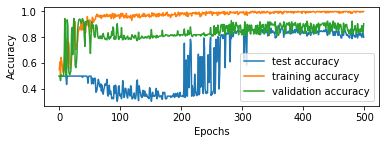

In [ ]:
from keras.models import load_model
import numpy as np
from numpy import expand_dims, zeros, ones, asarray
from numpy.random import randn, randint
A=[]
#test_custom()
# load the model
#disc_sup_trained_model = load_model('disc_sup_0400.h5')
for i in range(1,n_epochs+1):
  disc_sup_trained_model = load_model('disc_sup_%04d.h5' % (i))
#disc_sup_trained_model = load_model('/content/drive/MyDrive/Summer_Internship/realtime_fire/lepton/disc_sup_0500.h5')
# load the dataset
  path = "/content/drive/MyDrive/Summer_Internship/mlx_fire_test_final28.npz"
  with np.load(path) as data:
    #load DataX as train_data
    testX = data['Datay']
    testy=data['ty']
  (testX,testy) = (testX, testy ) 

# expand to 3d, e.g. add channels
  testX = expand_dims(testX, axis=-1)

# convert from ints to floats
  testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
  testX = (testX - 127.5) / 127.5



# evaluate the model
  print(testX.shape, testy.shape)
#%time k = disc_sup_trained_model.evaluate(testX,testy, verbose=0)
  _, testa = disc_sup_trained_model.evaluate(testX,testy, verbose=0)
  A.append(testa)
  print('Test Accuracy: %.3f%%' % (testa * 100))
# Predicting the Test set results
#%time l =  disc_sup_trained_model.predict(testX)
#print(y_pred_test)
  y_pred_test_1 = disc_sup_trained_model.predict(testX)
  prediction_test_1 = np.argmax(y_pred_test_1, axis=1)
  #print(prediction_test_1)

def epoch(A,a2,testacc):
  plt.subplot(2,1,1)
  plt.plot(A , label ='test accuracy')
  plt.plot(a2, label='training accuracy')
  plt.plot(testacc , label ='validation accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.savefig('./epochvstestacc12.png')
  plt.show()

epoch(A,a2,testacc)



In [ ]:
print(A)
print(a2)
print(testacc)

[0.5, 0.5, 0.4950000047683716, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4950000047683716, 0.4350000023841858, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49000000953674316, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49000000953674316, 0.4449999928474426, 0.4950000047683716, 0.5, 0.5, 0.5, 0.5, 0.4399999976158142, 0.48500001430511475, 0.47999998927116394, 0.4399999976158142, 0.47999998927116394, 0.48500001430511475, 0.47999998927116394, 0.375, 0.3799999952316284, 0.4000000059604645, 0.4399999976158142, 0.4749999940395355, 0.45500001311302185, 0.42500001192092896, 0.41499999165534973, 0.4399999976158142, 0.38499999046325684, 0.4300000071525574, 0.3700000047683716, 0.36000001430511475, 0.39500001072883606, 0.41499999165534973, 0.4399999976158142, 0.4300000071525574, 0.4300000071525574, 0.4749999940395355, 0.36500000953674316, 0.3449999988079071, 0.41499999165534973, 0.4300000071525574, 0.36000001430511475, 0.384

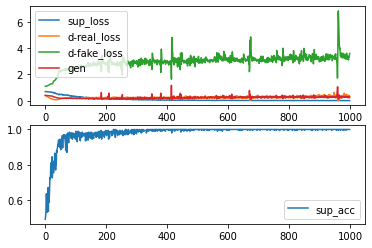

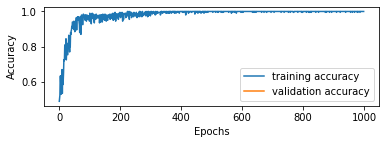

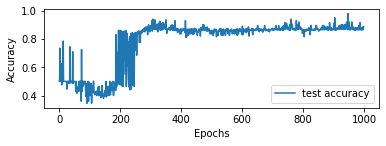

In [ ]:
def plot_history(a4, a5, a3, a2):
	# plot loss
  plt.subplot(2, 1, 1)
  plt.plot(a4, label='sup_loss')
  plt.plot(a5, label='d-real_loss')
  plt.plot(a6, label='d-fake_loss')
  plt.plot(a3, label='gen')
  plt.legend()
	# plot discriminator accuracy
  plt.subplot(2, 1, 2)
  plt.plot(a2, label='sup_acc')
  #plt.plot(testacc, label='test_acc')
	#pyplot.plot(a2_hist, label='acc-fake')
  plt.legend()
	# save plot to file
  plt.savefig('/content/drive/MyDrive/Summer_Internship/plot_line_plot_loss.png')
  plt.show()

def testepoch(testacc,a2):
  plt.subplot(2,1,1)
  plt.plot(a2, label='training accuracy')
  plt.plot(testacc , label ='validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig('/content/drive/MyDrive/Summer_Internship/epochvacc.png')
  plt.show()

def epoch(A):
  plt.subplot(2,1,1)
  plt.plot(A , label ='test accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.savefig('/content/drive/MyDrive/Summer_Internship/epochvstestacc.png')
  plt.show()

plot_history(a4, a5, a3, a2)
testepoch(testacc,a2)
epoch(A)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 32), dtype=tf.float32, name=None), name='leaky_re_lu/LeakyRelu:0', description="created by layer 'leaky_re_lu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 64), dtype=tf.float32, name=None), name='leaky_re_lu_1/LeakyRelu:0', description="created by layer 'leaky_re_lu_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 128), dtype=tf.float32, name=None), name='leaky_re_lu_2/LeakyRelu:0', description="created by layer 'leaky_re_lu_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(12, 28, 28, 1) (12,)
n_epochs=200, n_batch=12, b/e=1, steps=200
>1, c[0.690,42], d[0.415,1.099], g[0.406]
(12, 28, 28, 1) (12,)
Discriminator Accuracy: 50.000%
>Saved: gen_model_0001.h5, disc_sup_0001.h5 and disc_unsup_0001.h5
Test Accuracy: 50.000%
>2, c[0.680,92], d[0.403,1.101], g[0.405]
(12, 28, 28, 1) (12,)
Discriminator Accuracy: 50.000%
>Saved: gen_model_0002.h5, disc_sup_0002.h5 and disc_unsup_0002.h5
Test Accuracy: 50.000%
>3, c[0.690,58], d[0.392,1.102], g[0.404]
(12, 28, 28, 1) (12,)
Discriminator Accuracy: 50.000%
>Saved: gen_model_0003.h5, disc_sup_0003.h5 and disc_unsup_0003.h5
Test Accuracy: 50.000%
>4, c[0.688,50], d[0.386,1.105], g[0.403]
(12, 28, 28, 1) (12,)
Discriminator Accuracy: 50.000%
>Saved: gen_model_0004.h5, disc_sup_0004.h5 and disc_unsup_0004.h5
Test Accuracy: 50.000%
>5, c[0.707,33], d[0.377,1.107], g[0.402]
(12, 28, 28, 1) (12,)
Discriminator Accuracy: 50.000%
>Saved: gen_model_0005.h5, disc_sup_0005.h5 and disc_unsup_0005.h5
Test Accuracy: 50.000%
>6, c

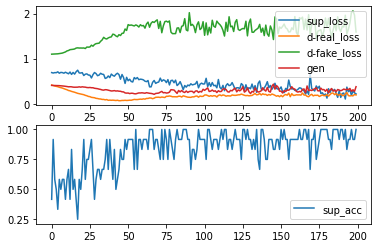

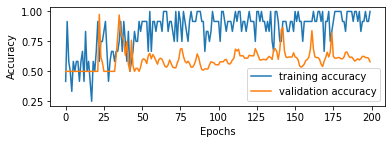

In [ ]:
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
z=[]
ganop=[]
testacc=[]
#GLOBAL VARIABLE FOR NUMBER OF CLASSES , BATCHES , EPOCHS
n_epochs = 200
n_classes = 2
n_batch = 12
latent_dim = 100
n_samples = 12

def define_generator(latent_dim):
	
  in_lat = Input(shape=(latent_dim,))
	#Start with enough dense nodes to be reshaped and ConvTransposed to 28x28x1
  n_nodes = 256 * 7 * 7
  X = Dense(n_nodes)(in_lat)
  X = LeakyReLU(alpha=0.2)(X)
  X = Reshape((7,7, 256))(X)
	
  X = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(X) #14x14x128
  X = LeakyReLU(alpha=0.2)(X)
	
  X = Conv2DTranspose(64, (3,3), strides=(1,1), padding='same')(X) #14x14x64
  X = LeakyReLU(alpha=0.2)(X)
	# output
  out_layer = Conv2DTranspose(1, (3,3), strides=(2,2), activation='tanh', 
                             padding='same')(X) #28x28x1
	# define model
  model = Model(in_lat, out_layer)
  model.summary()
  return model

  
def define_discriminator(in_shape=(28,28,1), n_classes=n_classes):
    in_image = Input(shape=in_shape)
    X = Conv2D(32, (3,3), strides=(2,2), padding='same')(in_image)
    X = LeakyReLU(alpha=0.2)(X)
    print(X)
    X = Conv2D(64, (3,3), strides=(2,2), padding='same')(X)
    X = LeakyReLU(alpha=0.2)(X)
    print(X)
    X = Conv2D(128, (3,3), strides=(2,2), padding='same')(X)
    X = LeakyReLU(alpha=0.2)(X)
    print(X)
    X = Flatten()(X)
    X = Dropout(0.4)(X) #Consider adding more dropout layers to minimize overfitting - remember we work with limited labeled data. 
    X = Dense(n_classes)(X)
    print(X)
    model = Model(inputs=in_image, outputs=X)
    model.summary()
    return model
define_discriminator()

def define_sup_discriminator(disc):
    model=Sequential()
    model.add(disc)
    model.add(Activation('softmax'))
    #Let us use sparse categorical loss so we dont have to convert our Y to categorical
    model.compile(optimizer=Adam(lr=0.0002, beta_1=0.5, epsilon=1e-07), 
                  loss="sparse_categorical_crossentropy",metrics=['accuracy'])
    return model

#Define the unsupervised discriminator
#Takes the output of the supervised, just before the softmax activation. 
#Then, adds a layer with calculation of sum of exponential outputs. (defined below as custom_activation)


#This custom activation layer gives a value close to 0 for smaller activations
#in the prior discriminator layer. It gives values close to 1 for large activations.
#This way it gives low activation for fake images. No need for sigmoid anymore.  

# custom activation function for the unsupervised discriminator
#D(x) = Z(x) / (Z(x) + 1) where Z(x) = sum(exp(l(x))). l(x) is the output from sup discr. prior to softmax
def custom_activation(x):
    Z_x = K.sum(K.exp(x), axis=-1, keepdims=True)
    D_x = Z_x /(Z_x+1)
    
    return D_x

def define_unsup_discriminator(disc):
    model=Sequential()
    model.add(disc)
    #model.add(Activation('softmax'))
    model.add(Lambda(custom_activation))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=2e-04, beta_1=0.5, epsilon = 1e-07))
    return model
# define the combined generator and discriminator model, for updating the generator
def define_gan(gen_model, disc_unsup):
	
  disc_unsup.trainable = True # make unsup. discriminator not trainable
  gan_output = disc_unsup(gen_model.output) #Gen. output is the input to disc. 
  model = Model(gen_model.input, gan_output)
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=2e-04, beta_1=0.5, epsilon=1e-07))
  ganop.append(gan_output)
  return model

#gan_model = define_gan(gen_model, disc_unsup)
#print("GAN MODEL SUMMARY::")
#print(gan_model.summary())

# load the images
def load_real_samples(n_classes=n_classes):
  
  path = "/content/drive/MyDrive/Summer_Internship/12img_fire_train_final28.npz"
  with np.load(path , allow_pickle=True) as data:
    #load DataX as train_data
    trainX = data['DataX']
    trainy = data['trainy'] 
    (trainX, trainy) = (trainX, trainy)
    X = expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = (X - 127.5) / 127.5  # scale from [0,255] to [-1,1] as we will be using tanh activation. 
    print(X.shape, trainy.shape)
    return [X, trainy]


#USED TO SELECT IMAGES. BUT IN OUR CASE ITS CHOOSING ALL THE 4 IMAGES
def select_supervised_samples(dataset, n_samples=n_samples, n_classes=n_classes):
  X, y = dataset
  X_list, y_list = list(), list()
  X_list = X
  y_list = y
  #print(X_list)
  #print(y_list)
  return asarray(X_list), asarray(y_list)    


# Pick real samples from the dataset.
#Return both images and corresponding labels in addition to y=1 indicating that the images are real. 
#Remember that we will not use the labels for unsupervised, only used for supervised. 
def generate_real_samples(dataset, n_samples=n_samples):
    
	images, labels = dataset
	ix = randint(0, images.shape[0], n_samples)
	X, labels = images[ix], labels[ix] #Select random images and corresponding labels
	y = ones((n_samples, 1)) #Label all images as 1 as these are real images. (for the discriminator training) 
	return [X, labels], y

# generate latent points, to be used as inputs to the generator. 
def generate_latent_points(latent_dim, n_samples=n_samples):
  z_input = randn(latent_dim * n_samples)
  z_input = z_input.reshape(n_samples, latent_dim) # reshape for input to the network
  #print(z_input)
  #z.append(z_input)
  return z_input

# Generate fake images using the generator and above latent points as input to it. 
#We do not care about labeles so the generator will not know anything about the labels. 
def generate_fake_samples(generator, latent_dim, n_samples=n_samples):
	
  z_input = generate_latent_points(latent_dim, n_samples)
  fake_images = generator.predict(z_input)
	# create class labels
  y = zeros((n_samples, 1)) #Label all images as 0 as these are fake images. (for the discriminator training) 
  #print(fake_images)

  return fake_images, y

# report accuracy and save plots & the model periodically. 
def summarize_performance(step, gen_model, disc_sup, latent_dim, dataset, n_samples=n_samples):
	# Generate fake images
  B, _ = generate_fake_samples(gen_model, latent_dim, n_samples)
  B = (B + 1) / 2.0 # scale to [0,1] for plotting
  A, _ = select_supervised_samples(dataset, n_samples=n_samples, n_classes=n_classes)
  A, _ = load_real_samples(n_classes)
  A = (A+1)/2.0
	# plot images
	# plot images
  
  #for i in range(n_steps):
  #if (i+1) % ((n_epochs/50) * 1) == 0:
  #for i in range(5):
    #plt.subplot(10, 10, 1 + i)
    #plt.axis('off')
    #plt.imshow(B[i, :, :, 0], cmap='gray_r')
    #plt.show()
      #filename1 = 'generated_img_%04d.png' % (n_epochs)
      #plt.savefig(filename1)
  #for i in range(5):
    #plt.subplot(10, 10, 1 + i)
    #plt.axis('off')
    #plt.imshow(A[i, :, :, 0], cmap='gray_r')
    #plt.show()

	# #save plot to drive

  #plt.close()  
	# evaluate the discriminator
 
  X, y = dataset
  X_fake, y_fake = generate_fake_samples(gen_model, latent_dim, n_batch)
  _, acc = disc_sup.evaluate(X, y, verbose=0)
  a1.append(acc)
  print('Discriminator Accuracy: %.3f%%' % (acc * 100))
  #print('Unsup Disc Output')
  #print(ganop)
  #ac = disc_unsup.evaluate(X_fake , y_fake, verbose=0)
  #print('Unsup Discriminator Accuracy: %.3f%%' % (ac * 100))



# train the generator and discriminator
def train(gen_model, disc_unsup, disc_sup, gan_model, dataset, latent_dim, n_epochs=n_epochs, n_batch=n_batch):
	
    # select supervised dataset for training.
   
  X_sup, y_sup = select_supervised_samples(dataset)
	#print(X_sup.shape, y_sup.shape)
	
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
	# iterations
  n_steps = bat_per_epo * n_epochs
	
  #half_batch = int(n_batch / 2)
  print('n_epochs=%d, n_batch=%d, b/e=%d, steps=%d' % (n_epochs, 
                                                              n_batch, 
                                                              bat_per_epo, n_steps))
	
    #  enumerate epochs
  for j in range(n_epochs):
    for i in range(bat_per_epo):
		# update supervised discriminator (disc_sup) on real samples.
        #Remember that we use real labels to train as this is supervised. 
        #This is the discriminator we really care about at the end.
        #Also, this is a multiclass classifier, not binary. Therefore, our y values 
        #will be the real class labels for MNIST. (NOT 1 or 0 indicating real or fake.)
      [Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], n_batch)
      sup_loss, sup_acc = disc_sup.train_on_batch(Xsup_real, ysup_real)

          
		# update unsupervised discriminator (disc_unsup) - just like in our regular GAN.
        #Remember that we will not train on labels as this is unsupervised, just binary as in our regular GAN.
        #The y_real below indicates 1s telling the discriminator that these images are real. 
        #do not confuse this with class labels. 
        #We will discard this discriminator at the end. 
      [X_real, _], y_real = generate_real_samples(dataset, n_batch) 
      d_loss_real  = disc_unsup.train_on_batch(X_real, y_real)
        #Now train on fake. 
      X_fake, y_fake = generate_fake_samples(gen_model, latent_dim, n_batch)
      d_loss_fake  = disc_unsup.train_on_batch(X_fake, y_fake)
        
		# update generator (gen) - like we do in regular GAN.
        #We can discard this model at the end as our primary goal is to train a multiclass classifier (sup. disc.)
      X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
      gan_loss = gan_model.train_on_batch(X_gan, y_gan)
      a2.append(sup_acc)
      a3.append(gan_loss)
      a4.append(sup_loss)
      a5.append(d_loss_real)
      a6.append(d_loss_fake)

		# evaluate the model performance every 'epoch'
    #plot_history(a4, a5, a3, a2) 
    # record history
   
		# summarize loss on this batch
    print('>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]' % (j+1, sup_loss, sup_acc*100, d_loss_real, d_loss_fake, gan_loss))
		# evaluate the model performance periodically


    #if (j+1) % ((n_epochs/10) * 1) == 0:
    summarize_performance(i, gen_model, disc_sup, latent_dim, dataset)

    filename2 = 'gen_model_%04d.h5' % (j+1)
    gen_model.save(filename2)
	# save the Discriminator (classifier) model
    filename3 = 'disc_sup_%04d.h5' % (j+1)
    disc_sup.save(filename3)

    filename4 = 'disc_unsup_%04d.h5' %(j+1)
    disc_unsup.save(filename4)
    print('>Saved: %s, %s and %s' % ( filename2, filename3 , filename4))
    from keras.models import load_model


# load the model
#disc_sup_trained_model = load_model('disc_sup_1000.h5')
    disc_sup_trained_model = load_model('disc_sup_%04d.h5' % (j+1))

# load the dataset
    path = "/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_final28.npz"
    with np.load(path) as data:
    #load DataX as train_data
      testX = data['Datay']
      testy = data['testy'] 
    (testX, testy) = (testX , testy) 

# expand to 3d, e.g. add channels
    testX = expand_dims(testX, axis=-1)

# convert from ints to floats
    testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
    testX = (testX - 127.5) / 127.5

# evaluate the model
    _, test_acc = disc_sup_trained_model.evaluate(testX, testy, verbose=0)
    print('Test Accuracy: %.3f%%' % (test_acc * 100))
    testacc.append(test_acc)
    y_pred_test = disc_sup_trained_model.predict(testX)
#print(y_pred_test)
    prediction_test = np.argmax(y_pred_test, axis=1)
    #print(prediction_test)

latent_dim = 100
# create the discriminator models
disc=define_discriminator() #Bare discriminator model... 
disc_sup=define_sup_discriminator(disc) #Supervised discriminator model
disc_unsup=define_unsup_discriminator(disc) #Unsupervised discriminator model. 
#gen_model = load_model('disc_sup_1000.h5')
gen_model = define_generator(latent_dim) #Generator
gan_model = define_gan(gen_model, disc_unsup) #GAN
dataset = load_real_samples() #Define the dataset by loading real samples. (This will be a list of 2 numpy arrays, X and y)
	# save the generator model



def plot_history(a4, a5, a3, a2):
	# plot loss
  plt.subplot(2, 1, 1)
  plt.plot(a4, label='sup_loss')
  plt.plot(a5, label='d-real_loss')
  plt.plot(a6, label='d-fake_loss')
  plt.plot(a3, label='gen')
  plt.legend()
	# plot discriminator accuracy
  plt.subplot(2, 1, 2)
  plt.plot(a2, label='sup_acc')
  #plt.plot(testacc, label='test_acc')
	#pyplot.plot(a2_hist, label='acc-fake')
  plt.legend()
	# save plot to file
  plt.savefig('./plot_line_plot_loss12.png')
  plt.show()

def testepoch(testacc):
  plt.subplot(2,1,1)
  plt.plot(a2, label='training accuracy')
  plt.plot(testacc , label ='validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig('./epochvacc12.png')
  plt.show()
	#plt.close()
# train the model

%time l = train(gen_model, disc_unsup, disc_sup, gan_model, dataset, latent_dim, n_epochs, n_batch)
plot_history(a4, a5, a3, a2)
testepoch(testacc)


(200, 28, 28, 1) (200,)
1: Test Accuracy: 50.000%
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(200, 28, 28, 1) (200,)
2: Test Accuracy: 50.000%
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(200, 28, 28, 1) (200,)
3: Test Accuracy: 50.000%
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

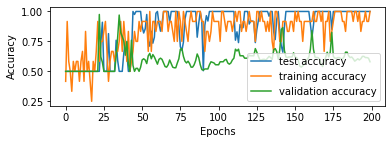

In [ ]:
from keras.models import load_model
import numpy as np
from numpy import expand_dims, zeros, ones, asarray
from numpy.random import randn, randint
A=[]
#test_custom()
# load the model
#disc_sup_trained_model = load_model('disc_sup_0400.h5')
for i in range(1,201):
  disc_sup_trained_model = load_model('disc_sup_%04d.h5' % (i))
#disc_sup_trained_model = load_model('/content/drive/MyDrive/Summer_Internship/realtime_fire/lepton/disc_sup_0500.h5')
# load the dataset
  path = "/content/drive/MyDrive/Summer_Internship/mlx_fire_test_final28.npz"
  with np.load(path) as data:
    #load DataX as train_data
    testX = data['Datay']
    testy=data['ty']
  (testX,testy) = (testX, testy ) 

# expand to 3d, e.g. add channels
  testX = expand_dims(testX, axis=-1)

# convert from ints to floats
  testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
  testX = (testX - 127.5) / 127.5



# evaluate the model
  print(testX.shape, testy.shape)
#%time k = disc_sup_trained_model.evaluate(testX,testy, verbose=0)
  _, testa = disc_sup_trained_model.evaluate(testX,testy, verbose=0)
  A.append(testa)
  print('%d: Test Accuracy: %.3f%%' % (i , testa * 100))
# Predicting the Test set results
#%time l =  disc_sup_trained_model.predict(testX)
#print(y_pred_test)
  y_pred_test_1 = disc_sup_trained_model.predict(testX)
  prediction_test_1 = np.argmax(y_pred_test_1, axis=1)
  print(prediction_test_1)

def epoch(A,a2,testacc):
  plt.subplot(2,1,1)
  plt.plot(A , label ='test accuracy')
  plt.plot(a2, label='training accuracy')
  plt.plot(testacc , label ='validation accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.savefig('./epochvstestacc12.png')
  plt.show()

epoch(A,a2,testacc)

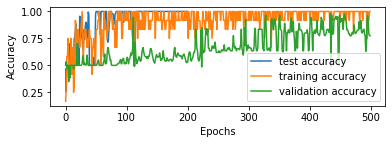

In [ ]:
def epoch(A,a2,testacc):
  plt.subplot(2,1,1)
  plt.plot(A , label ='test accuracy')
  plt.plot(a2, label='training accuracy')
  plt.plot(testacc , label ='validation accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.savefig('./epochvstestacc12.png')
  plt.show()

epoch(A,a2,testacc)

In [ ]:
print(A)
print(a2)
print(testacc)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.7400000095367432, 0.9100000262260437, 0.5, 0.5, 0.5, 0.8149999976158142, 0.5, 0.5, 0.5, 0.5, 0.7599999904632568, 0.5899999737739563, 0.5, 0.5, 0.5, 0.6499999761581421, 0.7450000047683716, 0.6499999761581421, 0.5, 0.5, 0.6299999952316284, 1.0, 0.9750000238418579, 1.0, 1.0, 1.0, 1.0, 0.875, 0.8199999928474426, 0.8550000190734863, 0.9750000238418579, 0.7549999952316284, 0.7099999785423279, 0.8349999785423279, 0.7350000143051147, 0.7850000262260437, 0.9850000143051147, 1.0, 0.8999999761581421, 0.8349999785423279, 0.8999999761581421, 1.0, 1.0, 1.0, 1.0, 0.9100000262260437, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8799999952316284, 0.7049999833106995, 0.675000011920929, 0.7450000047683716, 0.9350000023841858, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7850000262260437, 0.8999999761581421, 1.0, 0.9200000166893005, 0.5049999952316284, 0.8849999904632568, 0.9649999737739563, 0.9200000166893005, 1.0

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 32), dtype=tf.float32, name=None), name='leaky_re_lu_45/LeakyRelu:0', description="created by layer 'leaky_re_lu_45'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 64), dtype=tf.float32, name=None), name='leaky_re_lu_46/LeakyRelu:0', description="created by layer 'leaky_re_lu_46'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 128), dtype=tf.float32, name=None), name='leaky_re_lu_47/LeakyRelu:0', description="created by layer 'leaky_re_lu_47'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_15/BiasAdd:0', description="created by layer 'dense_15'")
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 14, 14, 32)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(12, 28, 28, 1) (12,)
n_epochs=500, n_batch=12, b/e=1, steps=500
>1, c[0.692,67], d[0.409,1.099], g[0.406]
>2, c[0.707,33], d[0.394,1.101], g[0.405]
>3, c[0.696,50], d[0.382,1.103], g[0.404]
>4, c[0.693,50], d[0.370,1.106], g[0.403]
>5, c[0.695,58], d[0.358,1.111], g[0.400]
>6, c[0.692,42], d[0.348,1.120], g[0.397]
>7, c[0.677,75], d[0.331,1.132], g[0.393]
>8, c[0.689,50], d[0.319,1.144], g[0.389]
>9, c[0.715,33], d[0.306,1.159], g[0.383]
>10, c[0.656,75], d[0.298,1.178], g[0.377]
>11, c[0.644,75], d[0.281,1.190], g[0.374]
>12, c[0.676,50], d[0.265,1.218], g[0.365]
>13, c[0.729,33], d[0.259,1.218], g[0.365]
>14, c[0.660,58], d[0.250,1.240], g[0.359]
>15, c[0.652,58], d[0.240,1.250], g[0.358]
>16, c[0.700,42], d[0.232,1.252], g[0.356]
>17, c[0.750,33], d[0.219,1.243], g[0.363]
>18, c[0.676,42], d[0.212,1.252], g[0.367]
>19, c[0.635,67], d[0.197,1.247], g[0.366]
>20, c[0.662,42], d[0.192,1.232], g[0.373]
>21, c[0.649,67], d[0.183,1.234], g[0.376]
>22, c[0.664,58], d[0.170,1.203], g[0.378

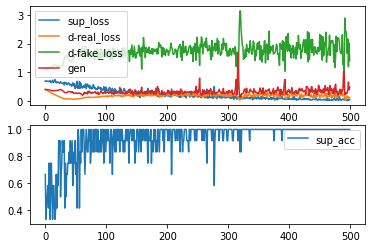

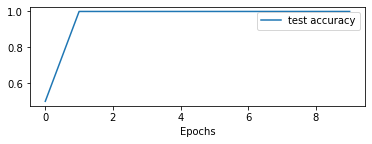

In [ ]:
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
z=[]
ganop=[]
testacc=[]
#GLOBAL VARIABLE FOR NUMBER OF CLASSES , BATCHES , EPOCHS
n_epochs = 500
n_classes = 2
n_batch = 12
latent_dim = 100
n_samples = 12

def define_generator(latent_dim):
	
  in_lat = Input(shape=(latent_dim,))
	#Start with enough dense nodes to be reshaped and ConvTransposed to 28x28x1
  n_nodes = 256 * 7 * 7
  X = Dense(n_nodes)(in_lat)
  X = LeakyReLU(alpha=0.2)(X)
  X = Reshape((7,7, 256))(X)
	
  X = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(X) #14x14x128
  X = LeakyReLU(alpha=0.2)(X)
	
  X = Conv2DTranspose(64, (3,3), strides=(1,1), padding='same')(X) #14x14x64
  X = LeakyReLU(alpha=0.2)(X)
	# output
  out_layer = Conv2DTranspose(1, (3,3), strides=(2,2), activation='tanh', 
                             padding='same')(X) #28x28x1
	# define model
  model = Model(in_lat, out_layer)
  model.summary()
  return model

  
def define_discriminator(in_shape=(28,28,1), n_classes=n_classes):
    in_image = Input(shape=in_shape)
    X = Conv2D(32, (3,3), strides=(2,2), padding='same')(in_image)
    X = LeakyReLU(alpha=0.2)(X)
    print(X)
    X = Conv2D(64, (3,3), strides=(2,2), padding='same')(X)
    X = LeakyReLU(alpha=0.2)(X)
    print(X)
    X = Conv2D(128, (3,3), strides=(2,2), padding='same')(X)
    X = LeakyReLU(alpha=0.2)(X)
    print(X)
    X = Flatten()(X)
    X = Dropout(0.4)(X) #Consider adding more dropout layers to minimize overfitting - remember we work with limited labeled data. 
    X = Dense(n_classes)(X)
    print(X)
    model = Model(inputs=in_image, outputs=X)
    model.summary()
    return model
define_discriminator()

def define_sup_discriminator(disc):
    model=Sequential()
    model.add(disc)
    model.add(Activation('softmax'))
    #Let us use sparse categorical loss so we dont have to convert our Y to categorical
    model.compile(optimizer=Adam(lr=0.0002, beta_1=0.5, epsilon=1e-07), 
                  loss="sparse_categorical_crossentropy",metrics=['accuracy'])
    return model

#Define the unsupervised discriminator
#Takes the output of the supervised, just before the softmax activation. 
#Then, adds a layer with calculation of sum of exponential outputs. (defined below as custom_activation)


#This custom activation layer gives a value close to 0 for smaller activations
#in the prior discriminator layer. It gives values close to 1 for large activations.
#This way it gives low activation for fake images. No need for sigmoid anymore.  

# custom activation function for the unsupervised discriminator
#D(x) = Z(x) / (Z(x) + 1) where Z(x) = sum(exp(l(x))). l(x) is the output from sup discr. prior to softmax
def custom_activation(x):
    Z_x = K.sum(K.exp(x), axis=-1, keepdims=True)
    D_x = Z_x /(Z_x+1)
    
    return D_x

def define_unsup_discriminator(disc):
    model=Sequential()
    model.add(disc)
    #model.add(Activation('softmax'))
    model.add(Lambda(custom_activation))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=2e-04, beta_1=0.5, epsilon = 1e-07))
    return model
# define the combined generator and discriminator model, for updating the generator
def define_gan(gen_model, disc_unsup):
	
  disc_unsup.trainable = True # make unsup. discriminator not trainable
  gan_output = disc_unsup(gen_model.output) #Gen. output is the input to disc. 
  model = Model(gen_model.input, gan_output)
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=2e-04, beta_1=0.5, epsilon=1e-07))
  ganop.append(gan_output)
  return model

#gan_model = define_gan(gen_model, disc_unsup)
#print("GAN MODEL SUMMARY::")
#print(gan_model.summary())

# load the images
def load_real_samples(n_classes=n_classes):
  
  path = "/content/drive/MyDrive/Summer_Internship/12img_fire_train_final28.npz"
  with np.load(path , allow_pickle=True) as data:
    #load DataX as train_data
    trainX = data['DataX']
    trainy = data['trainy'] 
    (trainX, trainy) = (trainX, trainy)
    X = expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = (X - 127.5) / 127.5  # scale from [0,255] to [-1,1] as we will be using tanh activation. 
    print(X.shape, trainy.shape)
    return [X, trainy]


#USED TO SELECT IMAGES. BUT IN OUR CASE ITS CHOOSING ALL THE 4 IMAGES
def select_supervised_samples(dataset, n_samples=n_samples, n_classes=n_classes):
  X, y = dataset
  X_list, y_list = list(), list()
  X_list = X
  y_list = y
  #print(X_list)
  #print(y_list)
  return asarray(X_list), asarray(y_list)    


# Pick real samples from the dataset.
#Return both images and corresponding labels in addition to y=1 indicating that the images are real. 
#Remember that we will not use the labels for unsupervised, only used for supervised. 
def generate_real_samples(dataset, n_samples=n_samples):
    
	images, labels = dataset
	ix = randint(0, images.shape[0], n_samples)
	X, labels = images[ix], labels[ix] #Select random images and corresponding labels
	y = ones((n_samples, 1)) #Label all images as 1 as these are real images. (for the discriminator training) 
	return [X, labels], y

# generate latent points, to be used as inputs to the generator. 
def generate_latent_points(latent_dim, n_samples=n_samples):
  z_input = randn(latent_dim * n_samples)
  z_input = z_input.reshape(n_samples, latent_dim) # reshape for input to the network
  #print(z_input)
  #z.append(z_input)
  return z_input

# Generate fake images using the generator and above latent points as input to it. 
#We do not care about labeles so the generator will not know anything about the labels. 
def generate_fake_samples(generator, latent_dim, n_samples=n_samples):
	
  z_input = generate_latent_points(latent_dim, n_samples)
  fake_images = generator.predict(z_input)
	# create class labels
  y = zeros((n_samples, 1)) #Label all images as 0 as these are fake images. (for the discriminator training) 
  #print(fake_images)

  return fake_images, y

# report accuracy and save plots & the model periodically. 
def summarize_performance(step, gen_model, disc_sup, latent_dim, dataset, n_samples=n_samples):
	# Generate fake images
  B, _ = generate_fake_samples(gen_model, latent_dim, n_samples)
  B = (B + 1) / 2.0 # scale to [0,1] for plotting
  A, _ = select_supervised_samples(dataset, n_samples=n_samples, n_classes=n_classes)
  A, _ = load_real_samples(n_classes)
  A = (A+1)/2.0
	# plot images
	# plot images
  
  #for i in range(n_steps):
  #if (i+1) % ((n_epochs/50) * 1) == 0:
  #for i in range(5):
    #plt.subplot(10, 10, 1 + i)
    #plt.axis('off')
    #plt.imshow(B[i, :, :, 0], cmap='gray_r')
    #plt.show()
      #filename1 = 'generated_img_%04d.png' % (n_epochs)
      #plt.savefig(filename1)
  #for i in range(5):
    #plt.subplot(10, 10, 1 + i)
    #plt.axis('off')
    #plt.imshow(A[i, :, :, 0], cmap='gray_r')
    #plt.show()

	# #save plot to drive

  #plt.close()  
	# evaluate the discriminator
 
  X, y = dataset
  X_fake, y_fake = generate_fake_samples(gen_model, latent_dim, n_batch)
  _, acc = disc_sup.evaluate(X, y, verbose=0)
  a1.append(acc)
  print('Discriminator Accuracy: %.3f%%' % (acc * 100))
  #print('Unsup Disc Output')
  #print(ganop)
  #ac = disc_unsup.evaluate(X_fake , y_fake, verbose=0)
  #print('Unsup Discriminator Accuracy: %.3f%%' % (ac * 100))



# train the generator and discriminator
def train(gen_model, disc_unsup, disc_sup, gan_model, dataset, latent_dim, n_epochs=n_epochs, n_batch=n_batch):
	
    # select supervised dataset for training.
   
  X_sup, y_sup = select_supervised_samples(dataset)
	#print(X_sup.shape, y_sup.shape)
	
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
	# iterations
  n_steps = bat_per_epo * n_epochs
	
  #half_batch = int(n_batch / 2)
  print('n_epochs=%d, n_batch=%d, b/e=%d, steps=%d' % (n_epochs, 
                                                              n_batch, 
                                                              bat_per_epo, n_steps))
	
    #  enumerate epochs
  for j in range(n_epochs):
    for i in range(bat_per_epo):
		# update supervised discriminator (disc_sup) on real samples.
        #Remember that we use real labels to train as this is supervised. 
        #This is the discriminator we really care about at the end.
        #Also, this is a multiclass classifier, not binary. Therefore, our y values 
        #will be the real class labels for MNIST. (NOT 1 or 0 indicating real or fake.)
      [Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], n_batch)
      sup_loss, sup_acc = disc_sup.train_on_batch(Xsup_real, ysup_real)

          
		# update unsupervised discriminator (disc_unsup) - just like in our regular GAN.
        #Remember that we will not train on labels as this is unsupervised, just binary as in our regular GAN.
        #The y_real below indicates 1s telling the discriminator that these images are real. 
        #do not confuse this with class labels. 
        #We will discard this discriminator at the end. 
      [X_real, _], y_real = generate_real_samples(dataset, n_batch) 
      d_loss_real  = disc_unsup.train_on_batch(X_real, y_real)
        #Now train on fake. 
      X_fake, y_fake = generate_fake_samples(gen_model, latent_dim, n_batch)
      d_loss_fake  = disc_unsup.train_on_batch(X_fake, y_fake)
        
		# update generator (gen) - like we do in regular GAN.
        #We can discard this model at the end as our primary goal is to train a multiclass classifier (sup. disc.)
      X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
      gan_loss = gan_model.train_on_batch(X_gan, y_gan)
      a2.append(sup_acc)
      a3.append(gan_loss)
      a4.append(sup_loss)
      a5.append(d_loss_real)
      a6.append(d_loss_fake)

		# evaluate the model performance every 'epoch'
    #plot_history(a4, a5, a3, a2) 
    # record history
   
		# summarize loss on this batch
    print('>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]' % (j+1, sup_loss, sup_acc*100, d_loss_real, d_loss_fake, gan_loss))
		# evaluate the model performance periodically


    if (j+1) % ((n_epochs/10) * 1) == 0:
      summarize_performance(i, gen_model, disc_sup, latent_dim, dataset)

      filename2 = 'gen_model_%04d.h5' % (j+1)
      gen_model.save(filename2)
	# save the Discriminator (classifier) model
      filename3 = 'disc_sup_%04d.h5' % (j+1)
      disc_sup.save(filename3)

      filename4 = 'disc_unsup_%04d.h5' %(j+1)
      disc_unsup.save(filename4)
      print('>Saved: %s, %s and %s' % ( filename2, filename3 , filename4))
      from keras.models import load_model


# load the model
#disc_sup_trained_model = load_model('disc_sup_1000.h5')
      disc_sup_trained_model = load_model('disc_sup_%04d.h5' % (j+1))

# load the dataset
      path = "/content/drive/MyDrive/Summer_Internship/mlx_fire_test_final28.npz"
      with np.load(path) as data:
    #load DataX as train_data
        testX = data['Datay']
        ty = data['ty'] 
      (testX, ty) = (testX , ty) 

# expand to 3d, e.g. add channels
      testX = expand_dims(testX, axis=-1)

# convert from ints to floats
      testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
      testX = (testX - 127.5) / 127.5

# evaluate the model
      _, test_acc = disc_sup_trained_model.evaluate(testX, ty, verbose=0)
      print('Test Accuracy: %.3f%%' % (test_acc * 100))
      testacc.append(test_acc)
      y_pred_test = disc_sup_trained_model.predict(testX)
#print(y_pred_test)
      prediction_test = np.argmax(y_pred_test, axis=1)
      print(prediction_test)

latent_dim = 100
# create the discriminator models
disc=define_discriminator() #Bare discriminator model... 
disc_sup=define_sup_discriminator(disc) #Supervised discriminator model
disc_unsup=define_unsup_discriminator(disc) #Unsupervised discriminator model. 
#gen_model = load_model('disc_sup_1000.h5')
gen_model = define_generator(latent_dim) #Generator
gan_model = define_gan(gen_model, disc_unsup) #GAN
dataset = load_real_samples() #Define the dataset by loading real samples. (This will be a list of 2 numpy arrays, X and y)
	# save the generator model



def plot_history(a4, a5, a3, a2):
	# plot loss
  plt.subplot(2, 1, 1)
  plt.plot(a4, label='sup_loss')
  plt.plot(a5, label='d-real_loss')
  plt.plot(a6, label='d-fake_loss')
  plt.plot(a3, label='gen')
  plt.legend()
	# plot discriminator accuracy
  plt.subplot(2, 1, 2)
  plt.plot(a2, label='sup_acc')
  #plt.plot(testacc, label='test_acc')
	#pyplot.plot(a2_hist, label='acc-fake')
  plt.legend()
	# save plot to file
  plt.savefig('./plot_line_plot_loss.png')
  plt.show()

def testepoch(testacc):
  plt.subplot(2,1,1)
  plt.plot(testacc , label ='test accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.savefig('./epochvacc.png')
  plt.show()
	#plt.close()
# train the model

%time l = train(gen_model, disc_unsup, disc_sup, gan_model, dataset, latent_dim, n_epochs, n_batch)
plot_history(a4, a5, a3, a2)
testepoch(testacc)


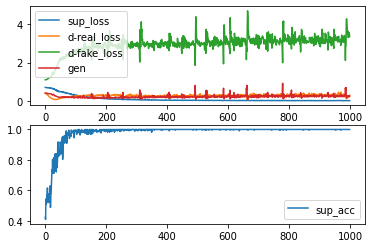

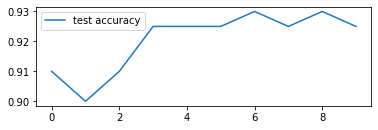

In [ ]:
def plot_history(a4):
	# plot loss
  plt.subplot(2, 1, 1)
  plt.plot(a4, label='sup_loss')
  plt.plot(a5, label='d-real_loss')
  plt.plot(a6, label='d-fake_loss')
  plt.plot(a3, label='gen')
  plt.legend()
	# plot discriminator accuracy
  plt.subplot(2, 1, 2)
  plt.plot(a2, label='sup_acc')
  #plt.plot(testacc, label='test_acc')
	#pyplot.plot(a2_hist, label='acc-fake')
  plt.legend()
	# save plot to file
  plt.savefig('./plot_line_plot_loss.png')
  plt.show()

def testepoch(testacc):
  plt.subplot(2,1,1)
  plt.plot(testacc , label ='test accuracy')
  plt.legend()
  plt.savefig('./epochvacc.png')
  plt.show()
	#plt.close()
# train the model


plot_history(a4, a5, a3, a2)
testepoch(testacc)

Testing cell to get prediction and evaluation time for unseen data containing 200 samples
---
Also gives the confusion matrix


(200, 28, 28, 1) (200,)
CPU times: user 195 ms, sys: 4.59 ms, total: 199 ms
Wall time: 207 ms
Test Accuracy: 100.000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
True Positive Rate 100
False Positive Rate 0
True Negative Rate 100
False Negative Rate 0


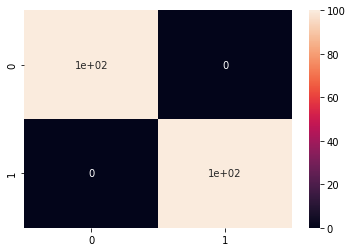

In [ ]:
from keras.models import load_model
import numpy as np
from numpy import expand_dims, zeros, ones, asarray
from numpy.random import randn, randint
#test_custom()
# load the model
#disc_sup_trained_model = load_model('disc_sup_1600.h5')
disc_sup_trained_model = load_model('disc_sup_%04d.h5' % (n_epochs))
#disc_sup_trained_model = load_model('/content/drive/MyDrive/Summer_Internship/mlx/models/disc_sup_0300_final.h5')
# load the dataset
path= "/content/drive/MyDrive/Summer_Internship/mlx_fire_test_final28.npz"
#path = "/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_final28.npz"
with np.load(path) as data:
    #load DataX as train_data
  testX = data['Datay']
  testy = data['ty'] 
(testX, testy) = (testX , testy) 

# expand to 3d, e.g. add channels
testX = expand_dims(testX, axis=-1)

# convert from ints to floats
testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
testX = (testX - 127.5) / 127.5
'''
for i in range(1):
  plt.subplot(10, 10, 1 + i)
  plt.axis('off')
  plt.imshow(testX[i, :, :, 0], cmap='gray_r')
  plt.show()
'''
# evaluate the model
print(testX.shape, testy.shape)
%time l = disc_sup_trained_model.evaluate(testX, testy, verbose=0)
_, test_acc = disc_sup_trained_model.evaluate(testX, testy, verbose=0)
print('Test Accuracy: %.3f%%' % (test_acc * 100))
# Predicting the Test set results
#%time y_pred_test_1 = disc_sup_trained_model.predict(testX)
y_pred_test_1 = disc_sup_trained_model.predict(testX)
#print(y_pred_test)
prediction_test_1 = np.argmax(y_pred_test_1, axis=1)
print(prediction_test_1)


#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(testy, prediction_test_1)
sns.heatmap(cm, annot=True)
tn,fp,fn,tp = confusion_matrix(testy, prediction_test_1).ravel()

print("True Positive Rate" , tp)
print("False Positive Rate" , fp)
print("True Negative Rate" , tn)
print("False Negative Rate" , fn)

In [ ]:
def compute_accuracy(tp,tn,fp,fn):
  
  return((tn+tp)*100/float(tn+fn+tp+fp))



In [ ]:
print("Accuracy = " , compute_accuracy(tp,tn,fp,fn))

Accuracy =  100.0


In [ ]:
def compute_precision(tp,fp):
  return ((tp*100)/float(tp+fp))

print("Precision = " , compute_precision(tp,fp))

Precision =  100.0


In [ ]:
def compute_recall(tp,fn):
  return ((tp*100)/float(tp+fn))
print("Recall = ", compute_recall(tp,fn))

Recall =  100.0


In [ ]:
def compute_f1_score(tp,tn,fp,fn):
  precision = compute_precision(tp,fp)/100
  recall = compute_recall(tp,fn)/100
  f1_score = (2*precision*recall)/(precision+recall)
  return f1_score

print("F1 score = ", compute_f1_score(tp,tn,fp,fn))

F1 score =  1.0


Testing for 1 sample to get prediction and evaluation time

In [ ]:
from keras.models import load_model
import numpy as np
from numpy import expand_dims, zeros, ones, asarray
from numpy.random import randn, randint
def test_custom():
  #label_2 = []
  vectorized_images_y = []
  count_1 = 0
  count=0
  path_to_files_train = "/content/drive/MyDrive/Summer_Internship/realtime_fire/file/"
  for img in os.listdir(path_to_files_train):
                #if your image name contain 'contrast'
      #label_2.append((1))
      image_2 = Image.open(path_to_files_train + img).convert('L')
      image_2 = image_2.resize((28,28), Image.ANTIALIAS)
      image_array = np.array(image_2)
      vectorized_images_y.append(image_array)
      count= count+1
  Datay = vectorized_images_y
  print(count)
  #print(Datay)
  np.savez("/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_final_testtt28.npz",Datay=vectorized_images_y)

test_custom()

#disc_sup_trained_model = load_model('/content/drive/MyDrive/Summer_Internship/realtime_fire/models_thermal/disc_sup_0900_28.h5')
# load the dataset


1


In [ ]:
disc_sup_trained_model = load_model('disc_sup_%04d.h5' % (n_epochs))
path = "/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_final_testtt28.npz"
with np.load(path) as data:
    #load DataX as train_data
  testX = data['Datay']   
(testX) = (testX) 

# expand to 3d, e.g. add channels
testX = expand_dims(testX, axis=-1)

# convert from ints to floats
testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
testX = (testX - 127.5) / 127.5
'''
for i in range(1):
  plt.subplot(10, 10, 1 + i)
  plt.axis('off')
  plt.imshow(testX[i, :, :, 0], cmap='gray_r')
  plt.show()
'''
# evaluate the model
print(testX.shape)
#%time l = disc_sup_trained_model.evaluate(testX,  verbose=0)
#_, test_acc = disc_sup_trained_model.evaluate(testX, verbose=0)
#print('Test Accuracy: %.3f%%' % (test_acc * 100))
# Predicting the Test set results
%time l = disc_sup_trained_model.predict(testX)
y_pred_test_1 = disc_sup_trained_model.predict(testX)
print(y_pred_test_1)
prediction_test_1 = np.argmax(y_pred_test_1, axis=1)
print(prediction_test_1)

(1, 28, 28, 1)
CPU times: user 80.4 ms, sys: 1.83 ms, total: 82.3 ms
Wall time: 97.3 ms
[[9.9959272e-01 4.0733328e-04]]
[0]


Prediction of samples without label

In [ ]:
from keras.models import load_model
import numpy as np
from numpy import expand_dims, zeros, ones, asarray
from numpy.random import randn, randint
#test_custom()
# load the model
#disc_sup_trained_model = load_model('disc_sup_0700.h5')
disc_sup_trained_model = load_model('disc_sup_%04d.h5' % (n_epochs))
#disc_sup_trained_model = load_model('/content/drive/MyDrive/Summer_Internship/realtime_fire/models_thermal/disc_sup_0900_28.h5')
# load the dataset
path = "/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_finaltest28.npz"
with np.load(path) as data:
    #load DataX as train_data
  testX = data['Datay']   
(testX) = (testX) 

# expand to 3d, e.g. add channels
testX = expand_dims(testX, axis=-1)

# convert from ints to floats
testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
testX = (testX - 127.5) / 127.5
'''
for i in range(1):
  plt.subplot(10, 10, 1 + i)
  plt.axis('off')
  plt.imshow(testX[i, :, :, 0], cmap='gray_r')
  plt.show()
'''
# evaluate the model
print(testX.shape)
%timeit l = disc_sup_trained_model.evaluate(testX,  verbose=0)
_, test_acc = disc_sup_trained_model.evaluate(testX, verbose=0)
print('Test Accuracy: %.3f%%' % (test_acc * 100))
# Predicting the Test set results
y_pred_test_1 = disc_sup_trained_model.predict(testX)
print(y_pred_test_1)
prediction_test_1 = np.argmax(y_pred_test_1, axis=1)
print(prediction_test_1)


#CONFUSION MATRIX


Generator generating images 

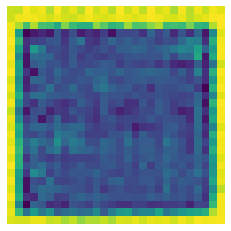

In [ ]:
from pylab import *
from keras.models import load_model
import tensorflow as tf
def show_plot(examples, n):
  for i in range(n * n):
    plt.subplot(n, n, 1 + i)
    plt.axis('off')
    plt.imshow(tf.squeeze(examples[i, :, :, :]))
    plt.savefig('./gen_fig_%d.png'  %n_epochs)
  plt.show()
def generate_latent_points(latent_dim, n_samples):
  z_input = randn(latent_dim * n_samples)
  z_input = z_input.reshape(n_samples, latent_dim) # reshape for input to the network
  #print(z_input)
  #z.append(z_input)
  return z_input
# load model
gen_trained_model = load_model('gen_model_0500.h5') #Model trained for 100 epochs
# generate images
latent_points = generate_latent_points(100, 100)  #Latent dim and n_samples
# generate images
X = gen_trained_model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

X = (X*255).astype(np.uint8)

# plot the result
show_plot(X, 1)

Graph:
---

1) Test accuracy vs epochs

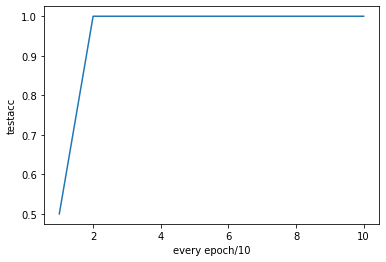

In [ ]:
b=list(range(1,10+1))
plt.plot(b,testacc)
plt.xlabel('every epoch/10')
plt.ylabel('testacc')
plt.savefig('./epochvcacc_%d.png'  %n_epochs)
plt.show()


Graphs:
---
2) Epochs vs Gen Loss




3) Epochs vs unsupervised discriminator loss-fake




4) Epochs vs unsupervised discriminator loss-real



5) Epochs vs supervised discriminator loss




6) Epochs vs supervised discriminator accurac





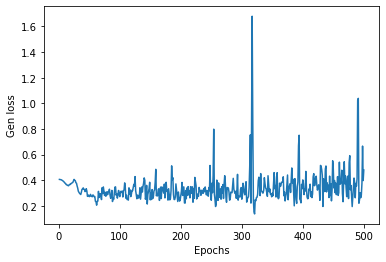

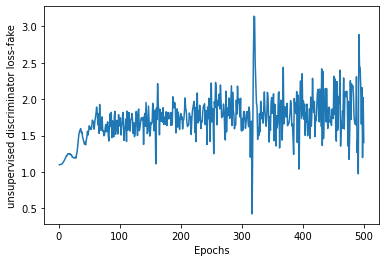

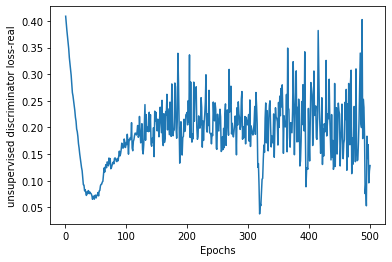

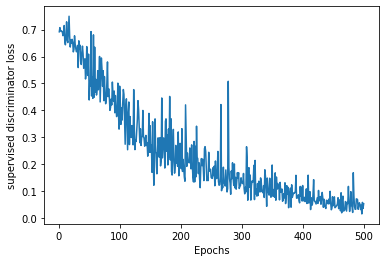

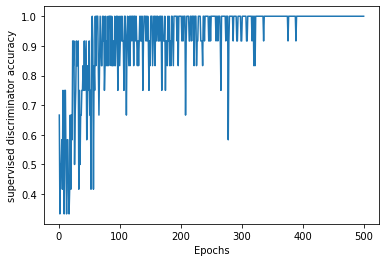

In [ ]:
c=list(range(1,n_epochs+1))
plt.plot(c,a3)
plt.xlabel('Epochs')
plt.ylabel('Gen loss')
plt.savefig('./genloss_%d.png' %n_epochs)
plt.show()
plt.plot(c,a6)
plt.xlabel('Epochs')
plt.ylabel('unsupervised discriminator loss-fake')
plt.savefig('./unsupdiclossfake_%d.png' %n_epochs)
plt.show()
plt.plot(c,a5)
plt.xlabel('Epochs')
plt.ylabel('unsupervised discriminator loss-real')
plt.savefig('./unsupdisclossreal_%d.png' %n_epochs)
plt.show()
plt.plot(c,a4)
plt.xlabel('Epochs')
plt.ylabel('supervised discriminator loss')
plt.savefig('./supdiscloss_%d.png' %n_epochs)
plt.show()
plt.plot(c,a2)
plt.xlabel('Epochs')
plt.ylabel('supervised discriminator accuracy')
plt.savefig('./supdiscacc_%d.png' %n_epochs)
plt.show()

(200, 28, 28, 1) (200,)
CPU times: user 170 ms, sys: 756 µs, total: 171 ms
Wall time: 165 ms
Test Accuracy: 100.000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
True Positive Rate 100
False Positive Rate 0
True Negative Rate 100
False Negative Rate 0
Accuracy =  100.0
Precision =  100.0
Recall =  100.0
F1 score =  1.0


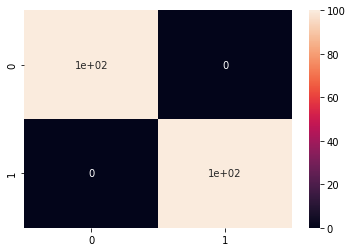

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import load_model
import numpy as np
from numpy import expand_dims, zeros, ones, asarray
from numpy.random import randn, randint
#test_custom()
# load the model
#disc_sup_trained_model = load_model('disc_sup_1600.h5')
disc_sup_trained_model = load_model('disc_sup_%04d.h5' % (n_epochs))
#disc_sup_trained_model = load_model('/content/drive/MyDrive/Summer_Internship/mlx/models/disc_sup_0300_final.h5')
# load the dataset
path= "/content/drive/MyDrive/Summer_Internship/mlx_fire_test_final28.npz"
#path = "/content/drive/MyDrive/Summer_Internship/mnistlikedataset_realtime_fire_test_final28.npz"
with np.load(path) as data:
    #load DataX as train_data
  testX = data['Datay']
  testy = data['ty'] 
(testX, testy) = (testX , testy) 

# expand to 3d, e.g. add channels
testX = expand_dims(testX, axis=-1)

# convert from ints to floats
testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
testX = (testX - 127.5) / 127.5
'''
for i in range(1):
  plt.subplot(10, 10, 1 + i)
  plt.axis('off')
  plt.imshow(testX[i, :, :, 0], cmap='gray_r')
  plt.show()
'''
# evaluate the model
print(testX.shape, testy.shape)
%time l = disc_sup_trained_model.evaluate(testX, testy, verbose=0)
_, test_acc = disc_sup_trained_model.evaluate(testX, testy, verbose=0)
print('Test Accuracy: %.3f%%' % (test_acc * 100))
# Predicting the Test set results
#%time y_pred_test_1 = disc_sup_trained_model.predict(testX)
y_pred_test_1 = disc_sup_trained_model.predict(testX)
#print(y_pred_test)
prediction_test_1 = np.argmax(y_pred_test_1, axis=1)
print(prediction_test_1)


cm = confusion_matrix(testy, prediction_test_1)
sns.heatmap(cm, annot=True)
tn,fp,fn,tp = confusion_matrix(testy, prediction_test_1).ravel()

print("True Positive Rate" , tp)
print("False Positive Rate" , fp)
print("True Negative Rate" , tn)
print("False Negative Rate" , fn)

def compute_accuracy(tp,tn,fp,fn):
  return((tn+tp)*100/float(tn+fn+tp+fp))
print("Accuracy = " , compute_accuracy(tp,tn,fp,fn))

def compute_precision(tp,fp):
  return ((tp*100)/float(tp+fp))
print("Precision = " , compute_precision(tp,fp))

def compute_recall(tp,fn):
  return ((tp*100)/float(tp+fn))
print("Recall = ", compute_recall(tp,fn))

def compute_f1_score(tp,tn,fp,fn):
  precision = compute_precision(tp,fp)/100
  recall = compute_recall(tp,fn)/100
  f1_score = (2*precision*recall)/(precision+recall)
  return f1_score

print("F1 score = ", compute_f1_score(tp,tn,fp,fn))